<a href="https://colab.research.google.com/github/akheel143/Reddit-comment-score-prediction/blob/main/Reddit_comment_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_datasets'

In [ ]:
%cd /content/drive/MyDrive/kaggle_datasets

/content/drive/MyDrive/kaggle_datasets


In [ ]:
!ls

comments_negative.csv  kaggle.json
comments_positive.csv  reddit-comment-score-prediction.zip


In [ ]:
!kaggle datasets download -d ehallmar/reddit-comment-score-prediction

reddit-comment-score-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
path='/content/drive/MyDrive/kaggle_datasets/reddit-comment-score-prediction.zip'

In [ ]:
!unzip /content/drive/MyDrive/kaggle_datasets/reddit-comment-score-prediction.zip

Archive:  /content/drive/MyDrive/kaggle_datasets/reddit-comment-score-prediction.zip
  inflating: comments_negative.csv   
  inflating: comments_positive.csv   


In [3]:
import pandas as pd
data_n=pd.read_csv('/content/drive/MyDrive/kaggle_datasets/comments_negative.csv')
data_p=pd.read_csv('/content/drive/MyDrive/kaggle_datasets/comments_positive.csv')

In [148]:
data_n.shape,data_p.shape

((2000000, 15), (2000000, 15))

In [149]:
data=pd.concat([data_n,data_p],axis=0)

In [ ]:
df=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [98]:
#shuffle the data
df= data.sample(frac = 1)

In [ ]:
#mapping authors and parent_authors with there count values
df["author"] = df["author"].map(df["author"].value_counts())
df["parent_author"] = df["parent_author"].map(df["parent_author"].value_counts())

In [ ]:
df=df.drop(['id','parent_id','subreddit_id','link_id','parent_link_id'],axis=1)

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df=df.drop(['text','parent_text'],axis=1)
df

In [2]:
df['score']

NameError: ignored

In [ ]:
df.isnull().sum()

In [107]:
df.dtypes

score                      int64
ups                        int64
author                     int64
controversiality           int64
parent_score               int64
parent_ups                 int64
parent_author              int64
parent_controversiality    int64
dtype: object

In [108]:
df.describe()

,score,ups,author,controversiality,parent_score,parent_ups,parent_author,parent_controversiality
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,9.189241e+01,9.189241e+01,5.166132e+04,8.262500e-04,2.185056e+02,2.185056e+02,3.935929e+04,1.706750e-03
std,2.117502e+02,2.117502e+02,1.441567e+05,2.873269e-02,4.340878e+02,4.340878e+02,1.185128e+05,4.127757e-02
min,-2.946000e+03,-2.946000e+03,1.000000e+00,0.000000e+00,-8.907000e+03,-8.907000e+03,1.000000e+00,0.000000e+00
25%,-1.000000e+01,-1.000000e+01,5.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,4.000000e+00,0.000000e+00
50%,3.000000e+01,3.000000e+01,1.800000e+01,0.000000e+00,6.600000e+01,6.600000e+01,1.300000e+01,0.000000e+00
75%,1.160000e+02,1.160000e+02,7.400000e+01,0.000000e+00,2.250000e+02,2.250000e+02,4.900000e+01,0.000000e+00
max,9.582000e+03,9.582000e+03,4.543610e+05,1.000000e+00,1.477600e+04,1.477600e+04,3.965910e+05,1.000000e+00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


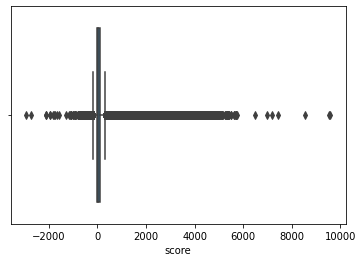

In [113]:
import seaborn as sns
sns.boxplot(df['score'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


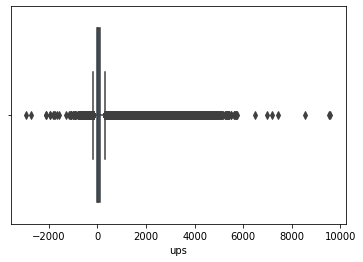

In [114]:
sns.boxplot(df['ups'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


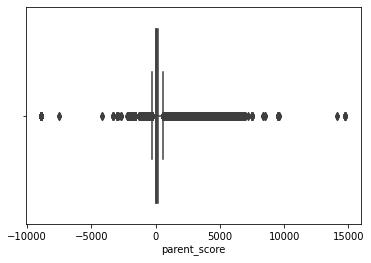

In [117]:
sns.boxplot(df['parent_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


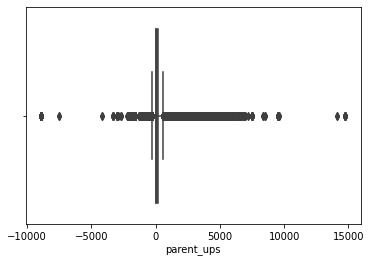

In [120]:
sns.boxplot(df['parent_ups'])

In [123]:
df['parent_ups'].unique()

array([  13,   84,   23, ..., 5178, -340, -881])

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('score',axis=1),df['score'],test_size=0.2)

In [128]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [126]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [ ]:
from 

In [129]:
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
reg.score(x_train,y_train)

0.9999936266377756

In [132]:
reg.score(x_test,y_test)

0.9999413327193128

In [133]:
prd=reg.predict(x_test)

In [144]:
prd=prd.reshape(800000,-1)
prd[0]

array([-45.])